# **📈 Exploratory Data Analysis Report: US Stock Market & Commodity Data (2019-2024)**

## **Name:** Pratham Agrawal
## **PRN:** 22070521078

## **Introduction**

This report presents a detailed **Exploratory Data Analysis (EDA)** on the "2019-2024 US Stock Market Data" dataset. The primary objective of this analysis is to uncover key patterns, trends, correlations, and volatility insights from market data spanning a dynamic five-year period.

The process involves:

- **Data Cleaning and Preprocessing**: Ensuring the time-series data is accurate, correctly typed, and ready for analysis.
- **Exploratory Data Analysis**: Using statistical summaries and a wide range of visualizations to explore price trends, volume activity, correlations, and sector performance.

This initial analysis forms the foundation for subsequent financial analysis and potential machine learning modeling for price prediction or risk assessment.

Authentic Dataset Link: https://www.kaggle.com/datasets/saketk511/2019-2024-us-stock-market-data

## **Part 1: Data Cleaning, Preprocessing (ETL), and Exploratory Data Analysis**

### **1. SETUP: IMPORTING NECESSARY LIBRARIES**

In [ ]:
# We start by importing the libraries we'll need for this analysis.
# - pandas: The primary tool for data manipulation and loading data.
# - numpy: For numerical operations, especially for handling data transformations.
# - matplotlib.pyplot & seaborn: Powerful libraries for creating static visualizations.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully.")

Libraries imported successfully.


### **2. DATA LOADING (EXTRACT)**

In [ ]:
# We load the dataset from the CSV file into a pandas DataFrame.
# A try-except block is used to handle potential FileNotFoundError.
file_path = 'Stock Market Dataset.csv'
try:
    df_raw = pd.read_csv(file_path)
    print(f"Dataset '{file_path}' loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
    exit()

Dataset 'Stock Market Dataset.csv' loaded successfully.


### **3. INITIAL DATA EXPLORATION**

The raw data was loaded from a `.csv` file. An initial inspection using `.info()` and `.head()` revealed several key issues requiring preprocessing:

- **Extraneous Column:**  
  An unnecessary `Unnamed: 0` column was present.

- **Incorrect Date Format:**  
  The `Date` column was stored as an object (string) instead of a proper `datetime` format.

- **Object-Type Price and Volume Columns:**  
  Several price and volume columns were stored as objects due to the presence of commas as thousand separators.

- **Missing Values:**  
  A number of volume columns contained missing (`NaN`) values.



In [ ]:
# Before cleaning, we must understand the raw data. This step helps us identify
# issues like an unnecessary index column, incorrect data types (especially for dates
# and prices with commas), and missing values.

In [ ]:
# Display the first 5 rows to get a feel for the data's structure.
print("\n--- First 5 Rows of the Raw Dataset ---")
print(df_raw.head())


--- First 5 Rows of the Raw Dataset ---
   Unnamed: 0        Date  Natural_Gas_Price  Natural_Gas_Vol.  \
0           0  02-02-2024              2.079               NaN   
1           1  01-02-2024              2.050          161340.0   
2           2  31-01-2024              2.100          142860.0   
3           3  30-01-2024              2.077          139750.0   
4           4  29-01-2024              2.490            3590.0   

   Crude_oil_Price  Crude_oil_Vol.  Copper_Price  Copper_Vol. Bitcoin_Price  \
0            72.28             NaN        3.8215          NaN     43,194.70   
1            73.82        577940.0        3.8535          NaN     43,081.40   
2            75.85        344490.0        3.9060          NaN     42,580.50   
3            77.82        347240.0        3.9110          NaN     42,946.20   
4            76.78        331930.0        3.8790          NaN     43,299.80   

   Bitcoin_Vol.  ... Berkshire_Price  Berkshire_Vol. Netflix_Price  \
0       42650.0  

In [ ]:
# Get a concise summary of the DataFrame to check data types and non-null counts.
print("\n--- Raw Dataset Info ---")
df_raw.info()


--- Raw Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1243 non-null   int64  
 1   Date               1243 non-null   object 
 2   Natural_Gas_Price  1243 non-null   float64
 3   Natural_Gas_Vol.   1239 non-null   float64
 4   Crude_oil_Price    1243 non-null   float64
 5   Crude_oil_Vol.     1220 non-null   float64
 6   Copper_Price       1243 non-null   float64
 7   Copper_Vol.        1206 non-null   float64
 8   Bitcoin_Price      1243 non-null   object 
 9   Bitcoin_Vol.       1243 non-null   float64
 10  Platinum_Price     1243 non-null   object 
 11  Platinum_Vol.      636 non-null    float64
 12  Ethereum_Price     1243 non-null   object 
 13  Ethereum_Vol.      1243 non-null   float64
 14  S&P_500_Price      1243 non-null   object 
 15  Nasdaq_100_Price   1243 non-null   object 
 16

In [ ]:
# Check for the number of missing values in each column.
print("\n--- Missing Values in Raw Dataset ---")
print(df_raw.isnull().sum())


--- Missing Values in Raw Dataset ---
Unnamed: 0             0
Date                   0
Natural_Gas_Price      0
Natural_Gas_Vol.       4
Crude_oil_Price        0
Crude_oil_Vol.        23
Copper_Price           0
Copper_Vol.           37
Bitcoin_Price          0
Bitcoin_Vol.           0
Platinum_Price         0
Platinum_Vol.        607
Ethereum_Price         0
Ethereum_Vol.          0
S&P_500_Price          0
Nasdaq_100_Price       0
Nasdaq_100_Vol.        1
Apple_Price            0
Apple_Vol.             0
Tesla_Price            0
Tesla_Vol.             0
Microsoft_Price        0
Microsoft_Vol.         0
Silver_Price           0
Silver_Vol.           47
Google_Price           0
Google_Vol.            0
Nvidia_Price           0
Nvidia_Vol.            0
Berkshire_Price        0
Berkshire_Vol.         0
Netflix_Price          0
Netflix_Vol.           0
Amazon_Price           0
Amazon_Vol.            0
Meta_Price             0
Meta_Vol.              0
Gold_Price             0
Gold_Vol.  

### **4. CLEANING & PREPROCESSING (TRANSFORM)**
To ensure the integrity and reliability of the analysis, a series of data transformation (ETL) steps were performed:

- **Dropping Unnecessary Columns:**  
  The redundant `Unnamed: 0` index column was removed.

- **Standardization of Column Names:**  
  All column names were converted to lowercase, and special characters like `.` and spaces were replaced with underscores to improve accessibility.

- **Data Type Correction:**  
  All price and volume columns stored as objects were cleaned by removing commas and then converted to the appropriate numeric (`float`) data type. The `Date` column was converted to a proper `datetime` format to enable time-series analysis.

- **Handling of Missing Values:**  
  Missing values, found primarily in the volume columns, were imputed using the **mean value** of their respective columns. This strategy was chosen to preserve the integrity of the time-series data without dropping valuable rows.

In [ ]:
# In this section, we clean the data to make it reliable for analysis.
# We create a copy of the raw data to ensure the original data remains unchanged.
df = df_raw.copy()

In [ ]:
# Step 4.1: Drop Unnecessary Columns
# The 'Unnamed: 0' column is an artifact from a previous save and is redundant.
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)
    print("\nDropped 'Unnamed: 0' column.")


Dropped 'Unnamed: 0' column.


In [ ]:
# Step 4.2: Standardize Column Names
# We convert all column names to lowercase and replace special characters ('.', ' ')
# with underscores to make them easier to access in code.
df.columns = df.columns.str.lower().str.replace('[. ]', '_', regex=True)
print("\nColumn names have been standardized.")


Column names have been standardized.


In [ ]:
# Step 4.3: Correct Data Types for Numeric Columns
# Several price columns were read as 'object' type because they contain commas.
# We remove the commas and convert these columns to a numeric (float) type.
cols_to_convert = [
    'bitcoin_price', 'platinum_price', 'ethereum_price', 's&p_500_price',
    'nasdaq_100_price', 'berkshire_price', 'gold_price'
]
for col in cols_to_convert:
    if col in df.columns and df[col].dtype == 'object':
        df[col] = df[col].str.replace(',', '', regex=False).astype(float)
print("\nConverted object-type numeric columns to float.")


Converted object-type numeric columns to float.


In [ ]:
# Step 4.4: Convert 'date' Column to Datetime
# The 'date' column is converted to a proper datetime format, which is essential
# for time-series analysis and plotting.
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
print("\nConverted 'date' column to datetime format.")


Converted 'date' column to datetime format.


In [ ]:
# Step 4.5: Handle Missing Values
# Missing values are primarily in the volume columns. A common strategy for time-series
# data is to fill missing values with the mean of the column to avoid losing data rows.
vol_cols = [col for col in df.columns if 'vol' in col]
for col in vol_cols:
    if df[col].isnull().any():
        mean_val = df[col].mean()
        df[col].fillna(mean_val, inplace=True)
print("\nFilled missing values in volume columns with their respective mean.")


Filled missing values in volume columns with their respective mean.


/tmp/ipython-input-36-2682919400.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_val, inplace=True)


In [ ]:
print("\n--- Data Cleaning and Preprocessing Complete ---")
print("\n--- First 5 Rows of the Cleaned Dataset ---")
print(df.head())


--- Data Cleaning and Preprocessing Complete ---

--- First 5 Rows of the Cleaned Dataset ---
        date  natural_gas_price  natural_gas_vol_  crude_oil_price  \
0 2024-02-02              2.079     131624.116223            72.28   
1 2024-02-01              2.050     161340.000000            73.82   
2 2024-01-31              2.100     142860.000000            75.85   
3 2024-01-30              2.077     139750.000000            77.82   
4 2024-01-29              2.490       3590.000000            76.78   

   crude_oil_vol_  copper_price   copper_vol_  bitcoin_price  bitcoin_vol_  \
0   398903.778689        3.8215  35406.616915        43194.7       42650.0   
1   577940.000000        3.8535  35406.616915        43081.4       47690.0   
2   344490.000000        3.9060  35406.616915        42580.5       56480.0   
3   347240.000000        3.9110  35406.616915        42946.2       55130.0   
4   331930.000000        3.8790  35406.616915        43299.8       45230.0   

   platinum_pri

### **5. EXPLORATORY DATA ANALYSIS (EDA) WITH VISUALIZATIONS**

In [ ]:
# Now we explore the cleaned data to uncover patterns, insights, and relationships.
# We set a consistent, clean style for all our plots using seaborn.
sns.set_style("whitegrid")

#### **5.1. Price Trends of Key Assets Over Time**

**Figure 1**: Line chart showing the price trends of three major asset classes: S&P 500 (stocks), Gold (metal), and Bitcoin (cryptocurrency).

**Observation**: This plot provides a high-level comparison of performance. Bitcoin exhibits the highest volatility and growth, especially during its 2021 bull run. The S&P 500 shows steady upward growth, while Gold has been relatively stable, acting as a traditional safe-haven asset.


Generating EDA Plot 5.1: Price Trends of Key Assets Over Time...


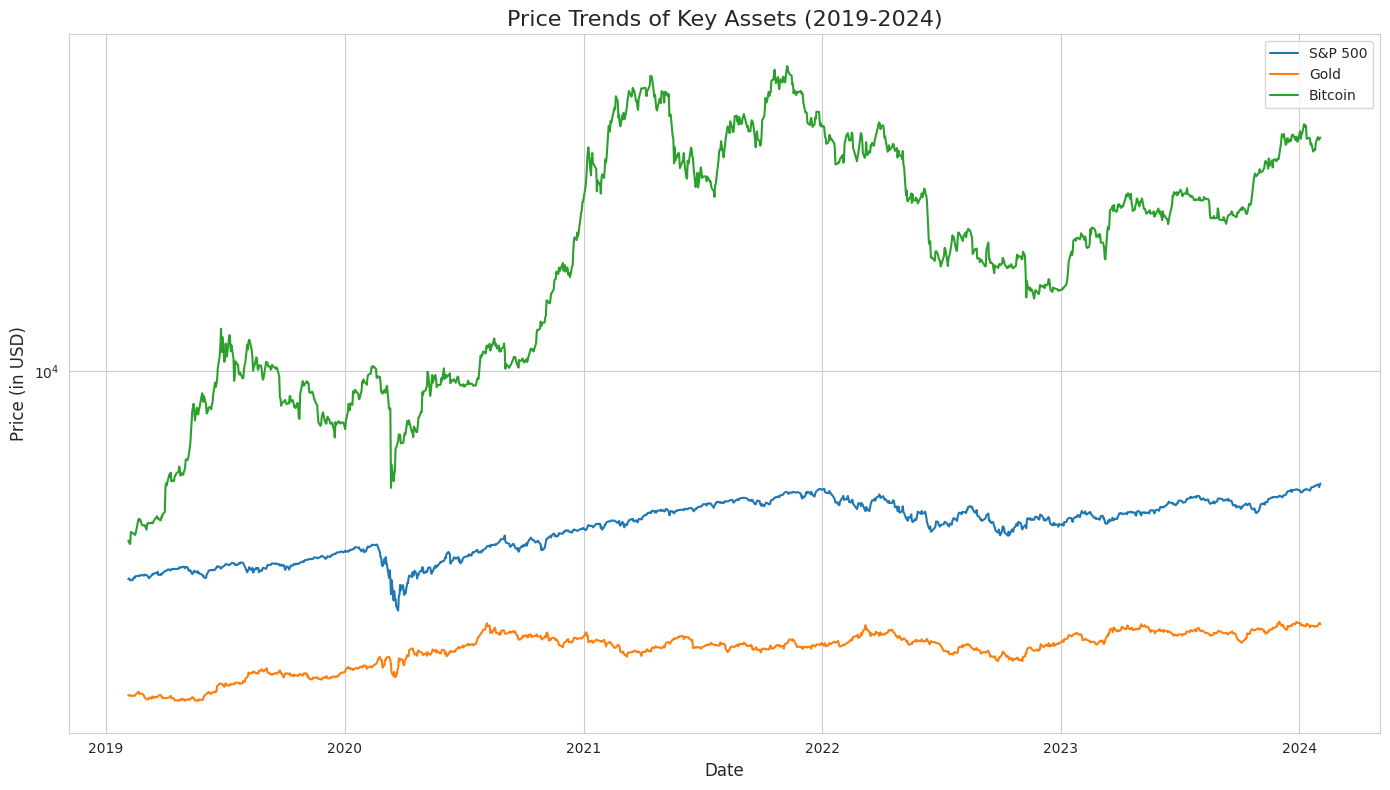

In [ ]:
# This plot visualizes the price movements of key assets from different sectors over the 5-year period.
# It helps in understanding the overall market trends and comparing the performance of stocks, commodities, and crypto.
print("\nGenerating EDA Plot 5.1: Price Trends of Key Assets Over Time...")
plt.figure(figsize=(14, 8))
sns.lineplot(x='date', y='s&p_500_price', data=df, label='S&P 500')
sns.lineplot(x='date', y='gold_price', data=df, label='Gold')
sns.lineplot(x='date', y='bitcoin_price', data=df, label='Bitcoin')
plt.title('Price Trends of Key Assets (2019-2024)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (in USD)', fontsize=12)
plt.yscale('log') # Using a log scale to better visualize trends with large price differences
plt.legend()
plt.tight_layout()
plt.savefig('price_trends_over_time.png')
plt.show()

#### **5.2. Asset Price Correlation Heatmap**

**Figure 2**: Heatmap showing the Pearson correlation coefficients between the prices of all assets in the dataset.

**Observation**: The heatmap reveals strong positive correlations within asset classes. For example, tech stocks like Apple, Microsoft, Google, and Nvidia are highly correlated with each other and the Nasdaq 100 index (correlation values > 0.9). Metals like Gold and Silver also show a strong positive correlation. Interestingly, Bitcoin and Ethereum have a very high correlation (0.96), indicating they move together. Commodities like Natural Gas show very low correlation with the stock market.


Generating EDA Plot 5.2: Asset Price Correlation Heatmap...


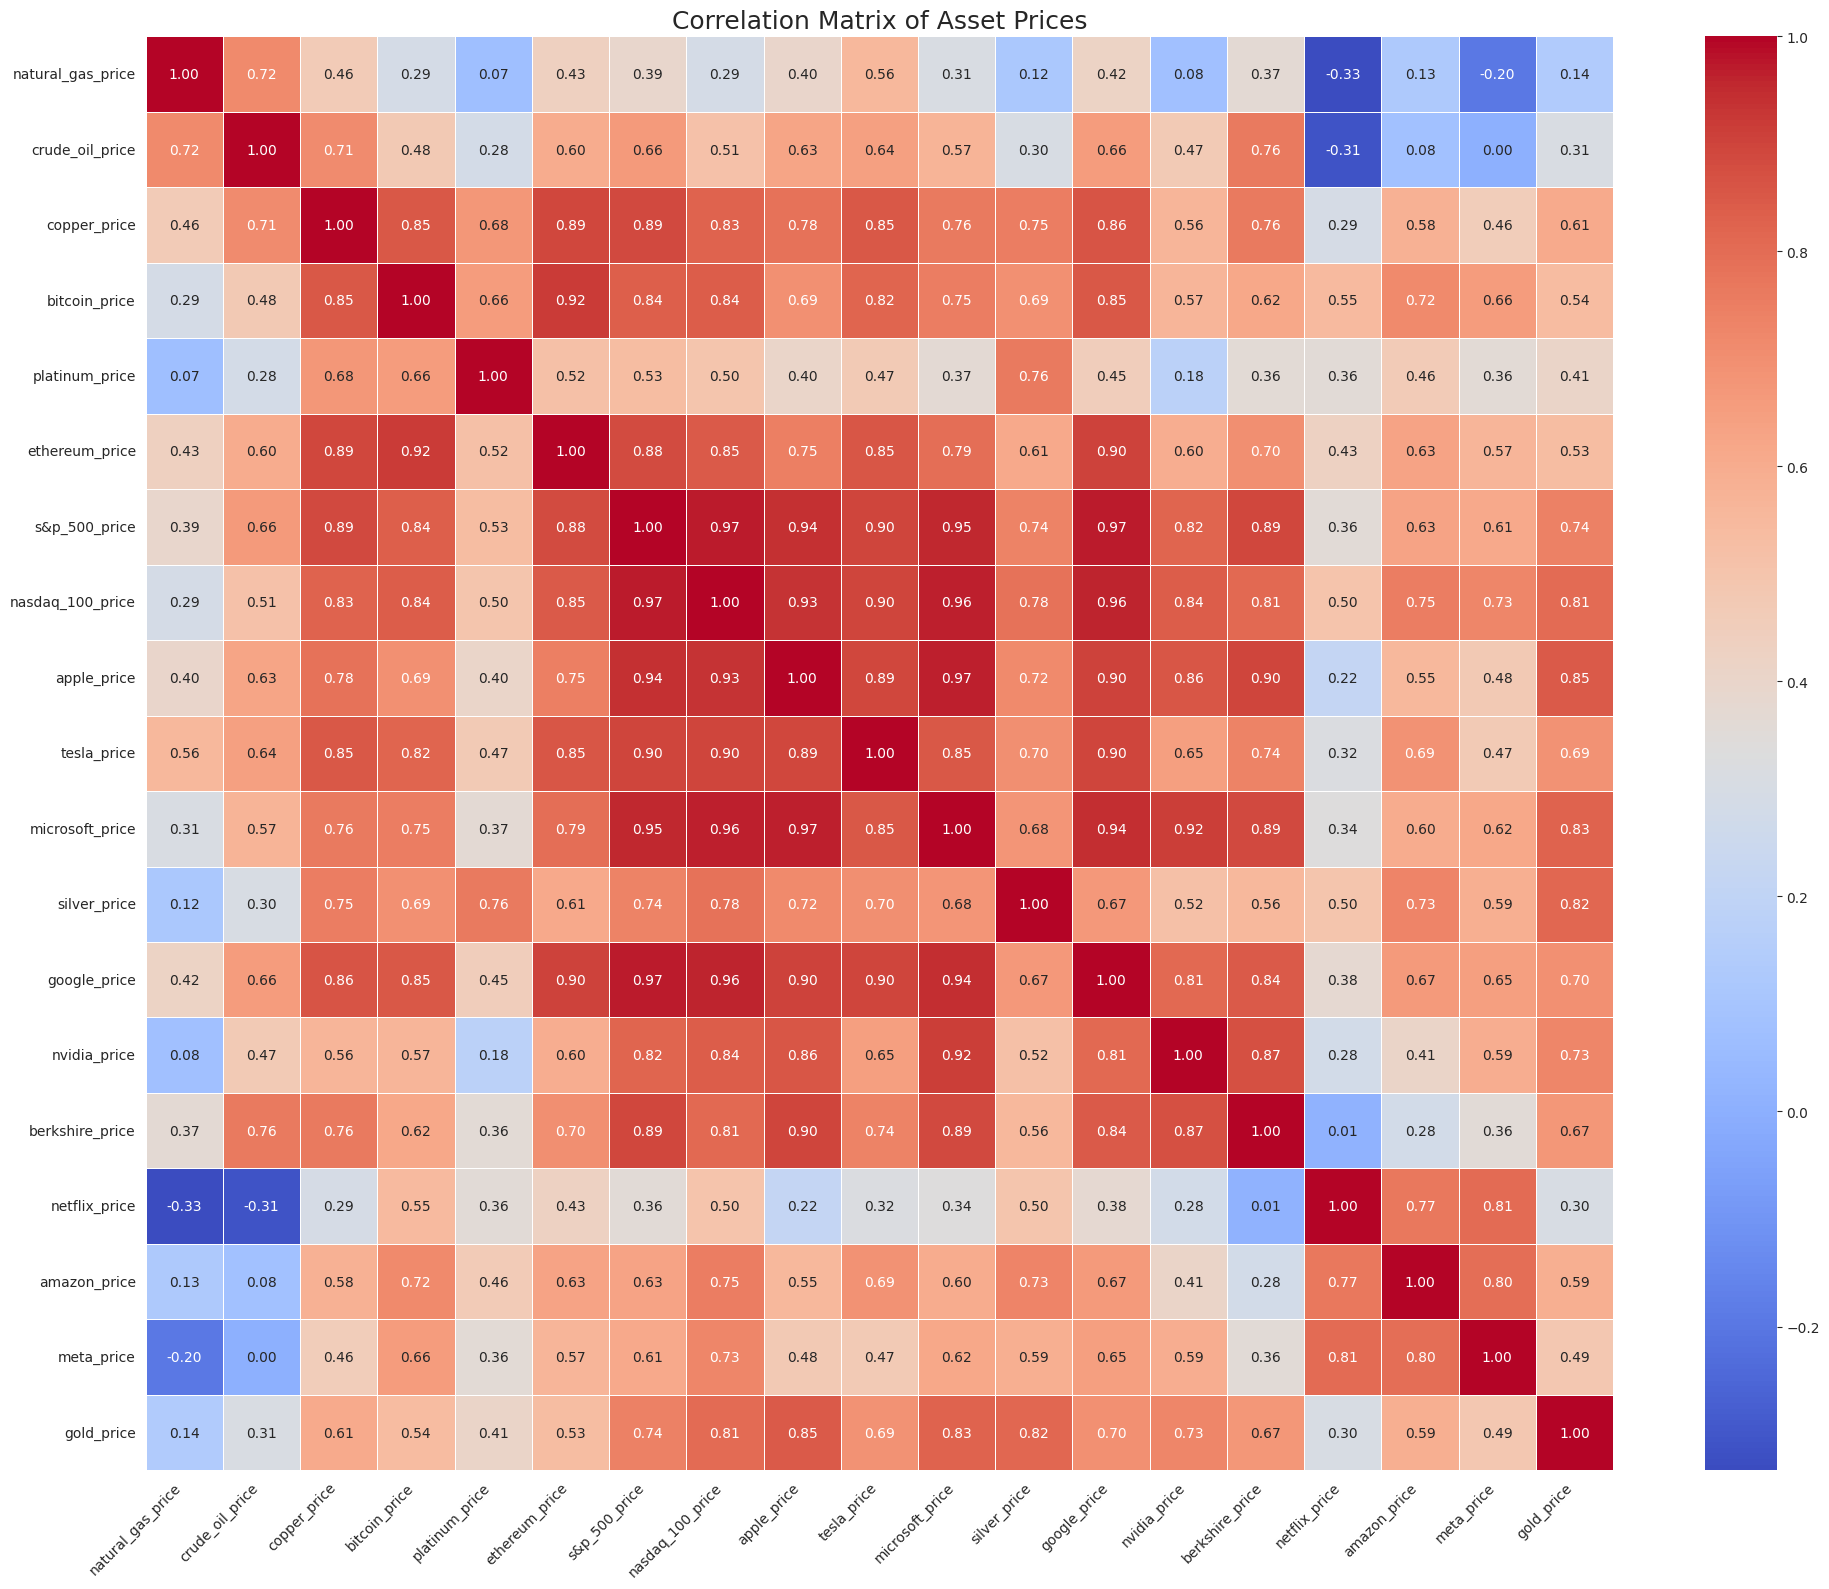

In [ ]:
# A correlation heatmap is excellent for visualizing the linear relationships between asset prices.
# It helps identify which assets tend to move together (positive correlation) or in opposite directions (negative correlation).
print("\nGenerating EDA Plot 5.2: Asset Price Correlation Heatmap...")

# Select only the price columns for the correlation matrix
price_cols = [col for col in df.columns if 'price' in col]
price_df = df[price_cols]

# Calculate the correlation matrix
corr_matrix = price_df.corr()

# Create the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Asset Prices', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('asset_price_correlation_heatmap.png')
plt.show()

#### **5.3. Volume Trends of Key Assets Over Time**

**Figure 3**: Line chart showing the trading volume for Crude Oil, Nasdaq 100, and Tesla.

**Observation**: Volume indicates market activity and interest. Tesla's trading volume shows significant spikes, often corresponding to periods of high price volatility or major company news. The Nasdaq 100's volume is generally higher and more consistent, reflecting the broad market activity of the tech sector. Crude oil volume also shows periods of high activity, particularly around geopolitical events affecting energy markets.


Generating EDA Plot 5.3: Volume Trends of Key Assets Over Time...


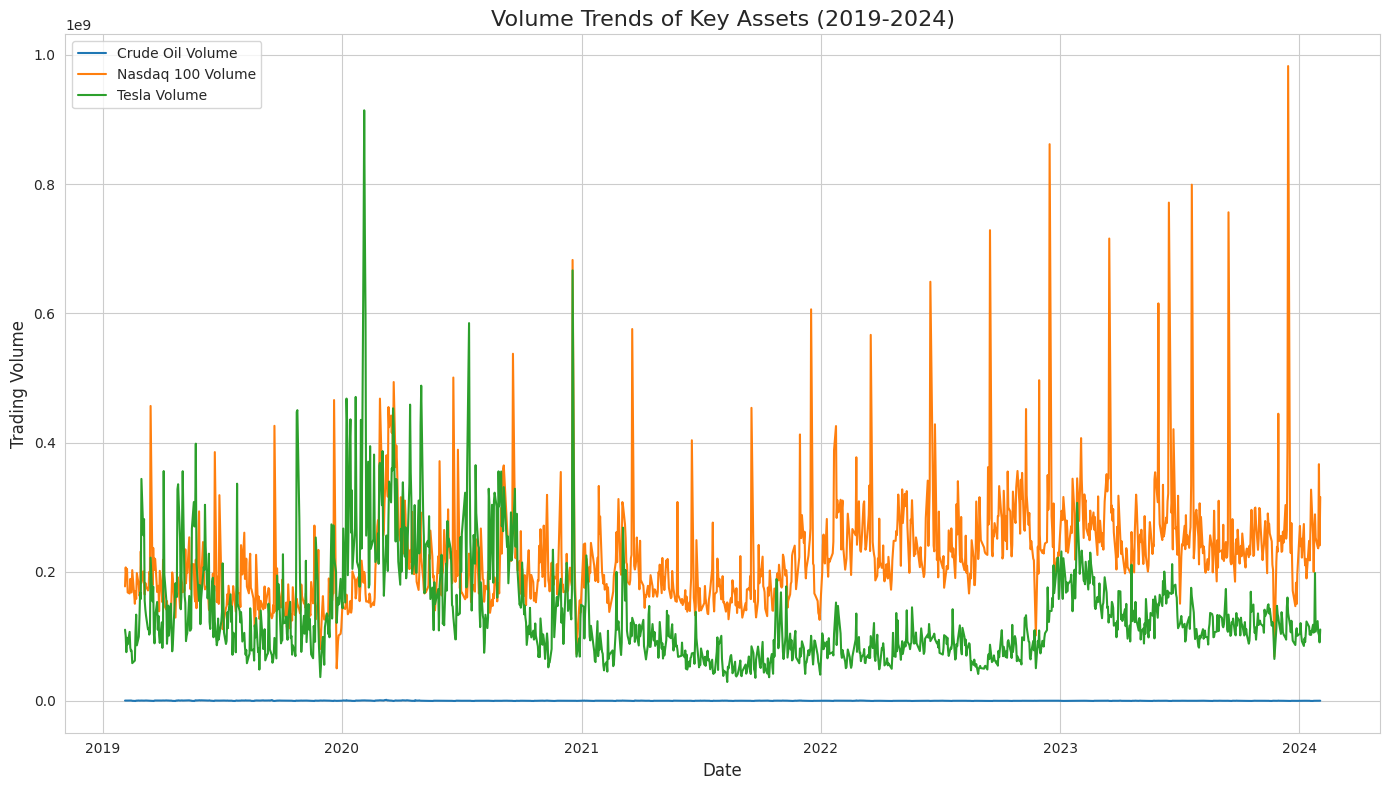

In [ ]:
# This plot shows the trading volume over time for selected assets.
# High volume often accompanies significant price moves and indicates high investor interest.
print("\nGenerating EDA Plot 5.3: Volume Trends of Key Assets Over Time...")
plt.figure(figsize=(14, 8))
sns.lineplot(x='date', y='crude_oil_vol_', data=df, label='Crude Oil Volume')
sns.lineplot(x='date', y='nasdaq_100_vol_', data=df, label='Nasdaq 100 Volume')
sns.lineplot(x='date', y='tesla_vol_', data=df, label='Tesla Volume')
plt.title('Volume Trends of Key Assets (2019-2024)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Trading Volume', fontsize=12)
plt.legend()
plt.tight_layout()
plt.savefig('volume_trends_over_time.png')
plt.show()

#### **5.4. Distribution of Daily Returns for S&P 500**

**Figure 4**: Histogram showing the frequency distribution of daily percentage returns for the S&P 500 index.

**Observation**: The distribution of daily returns is centered around zero, which is typical for financial assets. The shape is approximately a normal distribution but with 'fat tails,' meaning that extreme positive or negative returns occur more frequently than a perfect normal distribution would suggest. This is a key concept in financial risk management known as kurtosis.


Generating EDA Plot 5.4: Distribution of Daily Returns (S&P 500)...


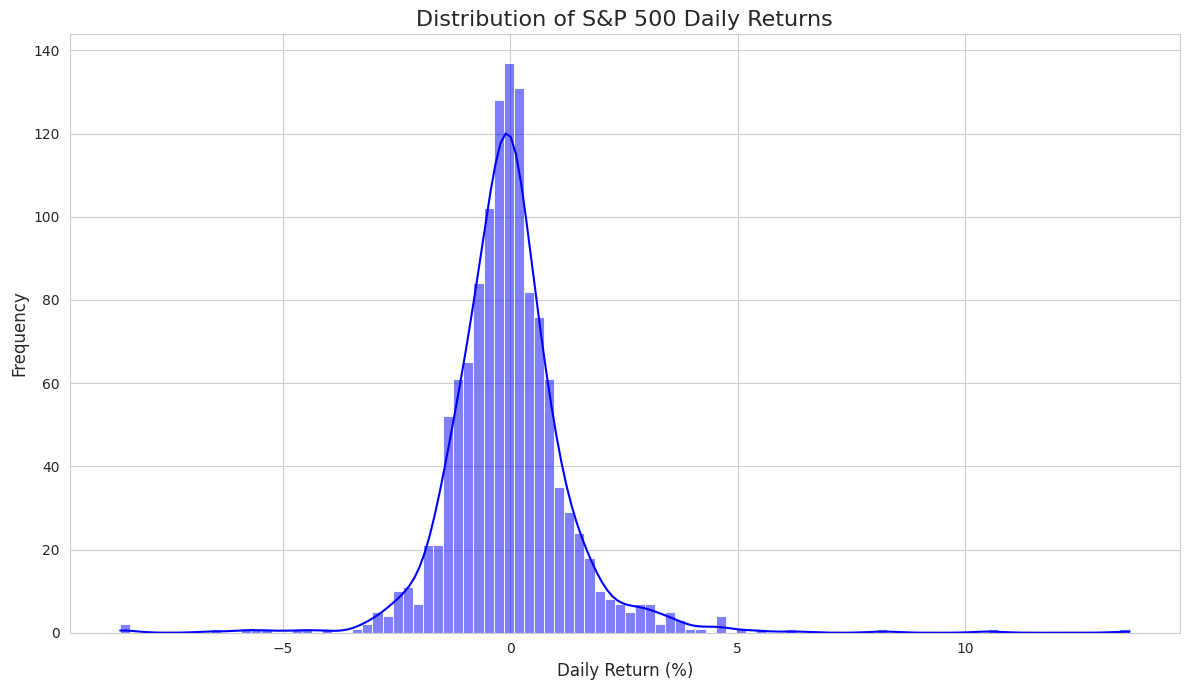

In [ ]:
# Analyzing the distribution of daily returns is a fundamental step in understanding an asset's risk and volatility.
# We calculate the percentage change in the S&P 500 price and plot it as a histogram.
print("\nGenerating EDA Plot 5.4: Distribution of Daily Returns (S&P 500)...")
df['sp500_returns'] = df['s&p_500_price'].pct_change() * 100
plt.figure(figsize=(12, 7))
sns.histplot(df['sp500_returns'].dropna(), bins=100, kde=True, color='blue')
plt.title('Distribution of S&P 500 Daily Returns', fontsize=16)
plt.xlabel('Daily Return (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.savefig('sp500_daily_returns_distribution.png')
plt.show()

#### **5.5. Box Plots of Monthly Prices**

**Figure 5**: Box plots showing the distribution of prices for Apple, Crude Oil, and Bitcoin for each month.

**Observation**: Box plots are useful for identifying seasonality and price distribution over time. For assets with a strong upward trend like Apple and Bitcoin, the boxes progressively move higher. The size of the boxes indicates the price volatility within that month; larger boxes mean greater price fluctuation. This visualization helps to compare the monthly price ranges and medians for different assets.


Generating EDA Plot 5.5: Box Plots of Monthly Prices...


/tmp/ipython-input-43-3776820555.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x='month', y='apple_price', data=df, palette='viridis')
/tmp/ipython-input-43-3776820555.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], x='month', y='crude_oil_price', data=df, palette='plasma')
/tmp/ipython-input-43-3776820555.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[2], x='month', y='bitcoin_price', data=df, palette='magma')


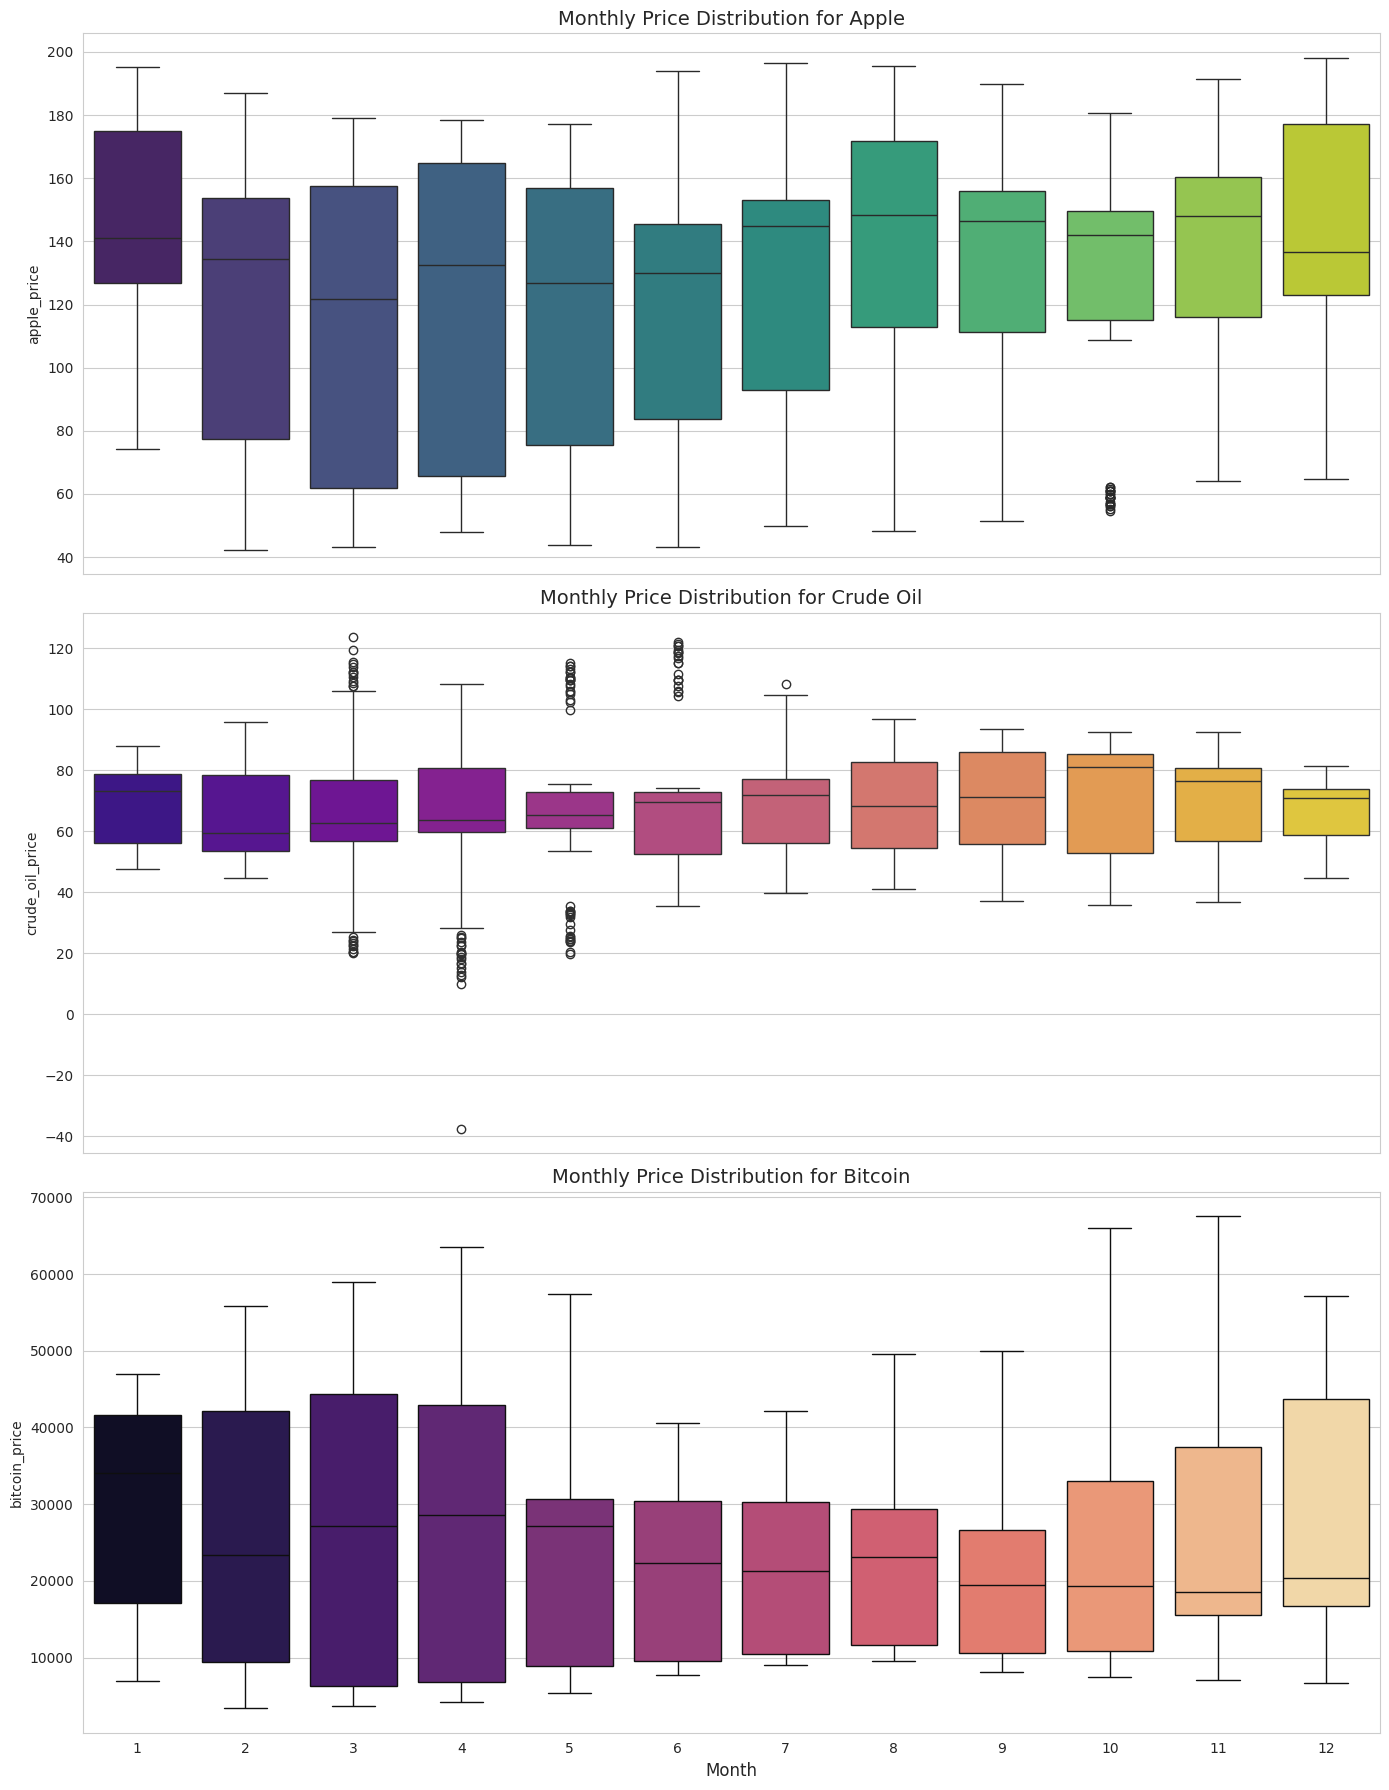

In [ ]:
# Box plots are used to visualize the distribution of data and identify outliers.
# Here, we group prices by month to see if there are any seasonal patterns or changes in price distribution over the year.
print("\nGenerating EDA Plot 5.5: Box Plots of Monthly Prices...")
df['month'] = df['date'].dt.month
fig, axes = plt.subplots(3, 1, figsize=(14, 18), sharex=True)
sns.boxplot(ax=axes[0], x='month', y='apple_price', data=df, palette='viridis')
axes[0].set_title('Monthly Price Distribution for Apple', fontsize=14)
sns.boxplot(ax=axes[1], x='month', y='crude_oil_price', data=df, palette='plasma')
axes[1].set_title('Monthly Price Distribution for Crude Oil', fontsize=14)
sns.boxplot(ax=axes[2], x='month', y='bitcoin_price', data=df, palette='magma')
axes[2].set_title('Monthly Price Distribution for Bitcoin', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.tight_layout()
plt.savefig('monthly_price_boxplots.png')
plt.show()

#### **5.6. Pair Plot of Selected Tech Stocks**

**Figure 6**: A grid of scatter plots showing the pairwise relationships between the prices of major tech stocks (Apple, Google, Microsoft, Tesla).

**Observation**: The pair plot is a powerful tool to visualize both the distribution of each variable (on the diagonal) and the relationships between them. The scatter plots show very strong, positive linear relationships between Apple, Google, and Microsoft, confirming the high correlation seen in the heatmap. Tesla's relationship with the others is also positive but appears slightly less linear, indicating its more unique price movements.


Generating EDA Plot 5.6: Pair Plot of Selected Tech Stocks...


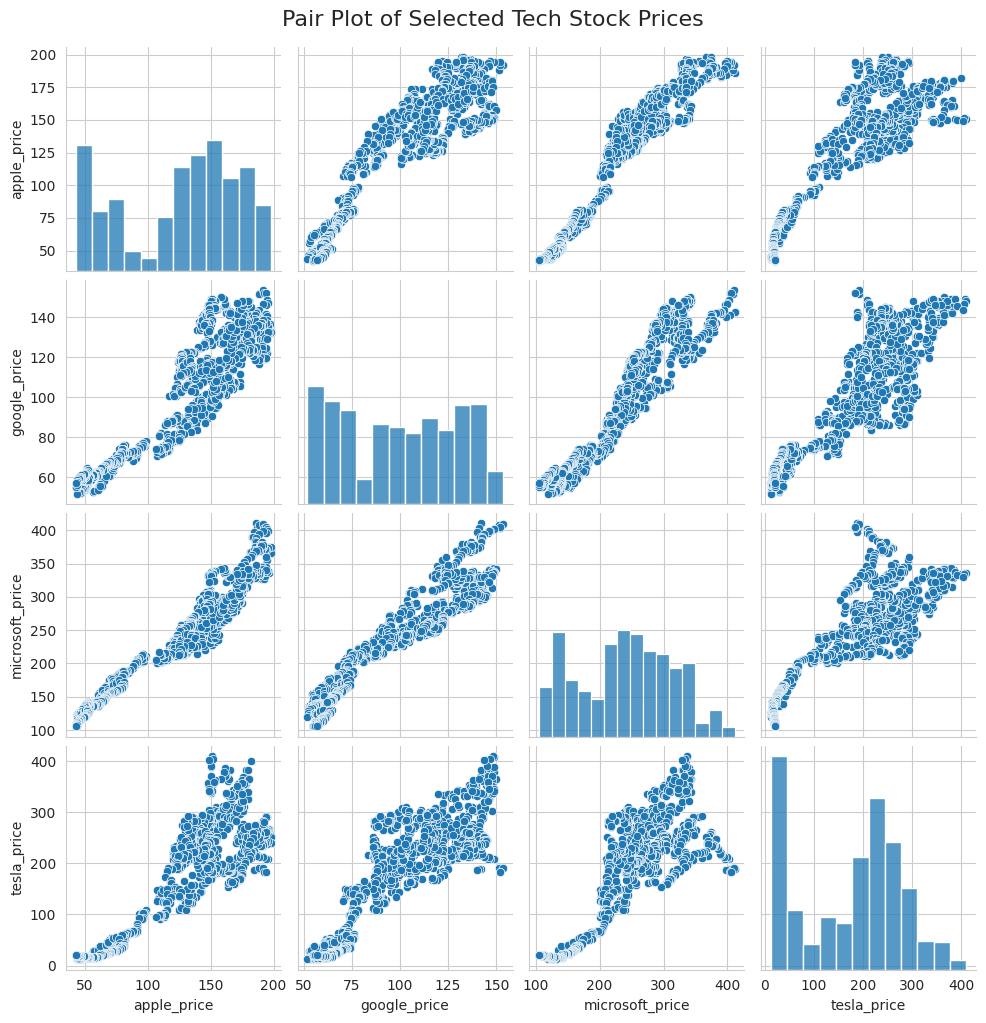

In [ ]:
# A pair plot allows us to see both the distribution of single variables and relationships between two variables.
# It's useful for a quick overview of how a group of assets relate to each other.
print("\nGenerating EDA Plot 5.6: Pair Plot of Selected Tech Stocks...")
tech_stocks = price_df[['apple_price', 'google_price', 'microsoft_price', 'tesla_price']]
sns.pairplot(tech_stocks)
plt.suptitle('Pair Plot of Selected Tech Stock Prices', y=1.02, fontsize=16)
plt.savefig('tech_stock_pairplot.png')
plt.show()

#### **5.7. Rolling Mean and Standard Deviation of Bitcoin Price**

**Figure 7**: Line chart showing the Bitcoin price, its 30-day rolling mean (moving average), and its 30-day rolling standard deviation (volatility).

**Observation**: The rolling mean smooths out short-term fluctuations and helps identify longer-term trends. The rolling standard deviation is a direct measure of volatility. The plot clearly shows that periods of high volatility in Bitcoin (spikes in the bottom line) coincide with its most dramatic price increases and decreases, particularly in 2021.


Generating EDA Plot 5.7: Rolling Mean and Standard Deviation (Bitcoin)...


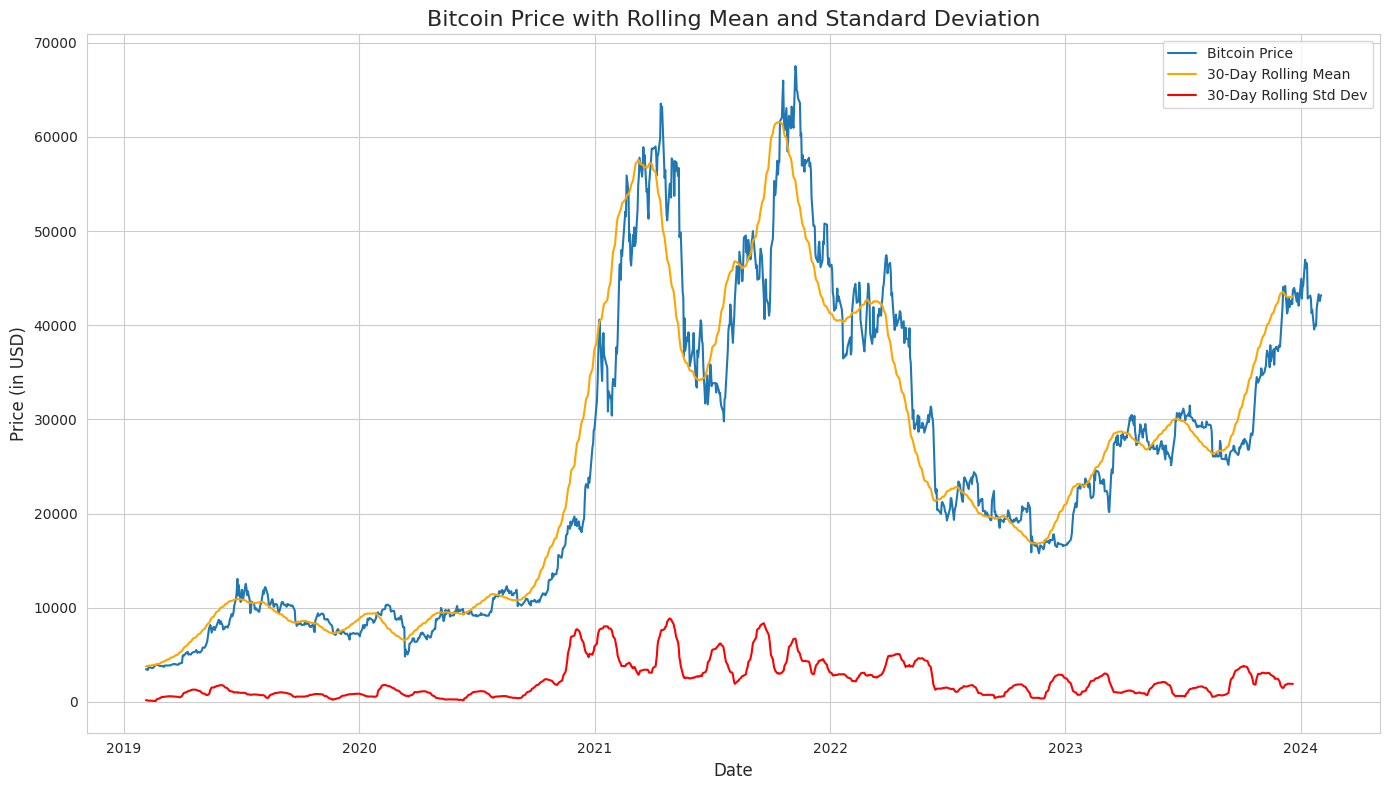

In [ ]:
# Rolling statistics are essential for time-series analysis.
# The rolling mean (or moving average) helps to smooth out price data and identify trends.
# The rolling standard deviation is a common measure of volatility.
print("\nGenerating EDA Plot 5.7: Rolling Mean and Standard Deviation (Bitcoin)...")
df.set_index('date', inplace=True)
rolling_mean = df['bitcoin_price'].rolling(window=30).mean()
rolling_std = df['bitcoin_price'].rolling(window=30).std()

plt.figure(figsize=(14, 8))
plt.plot(df.index, df['bitcoin_price'], label='Bitcoin Price')
plt.plot(rolling_mean.index, rolling_mean, label='30-Day Rolling Mean', color='orange')
plt.plot(rolling_std.index, rolling_std, label='30-Day Rolling Std Dev', color='red')
plt.title('Bitcoin Price with Rolling Mean and Standard Deviation', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (in USD)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.savefig('bitcoin_rolling_stats.png')
plt.show()
df.reset_index(inplace=True) # Reset index for subsequent plots

#### **5.8. Yearly Average Prices**

**Figure 8**: Bar chart showing the average price for several key assets for each year from 2019 to 2024.

**Observation**: This chart provides a clear year-over-year comparison of average prices. It highlights the massive growth in assets like Nvidia and Bitcoin, especially from 2020 onwards. More stable assets like Gold show much less dramatic year-over-year changes. This is a simple but effective way to visualize annual performance.


Generating EDA Plot 5.8: Yearly Average Prices...


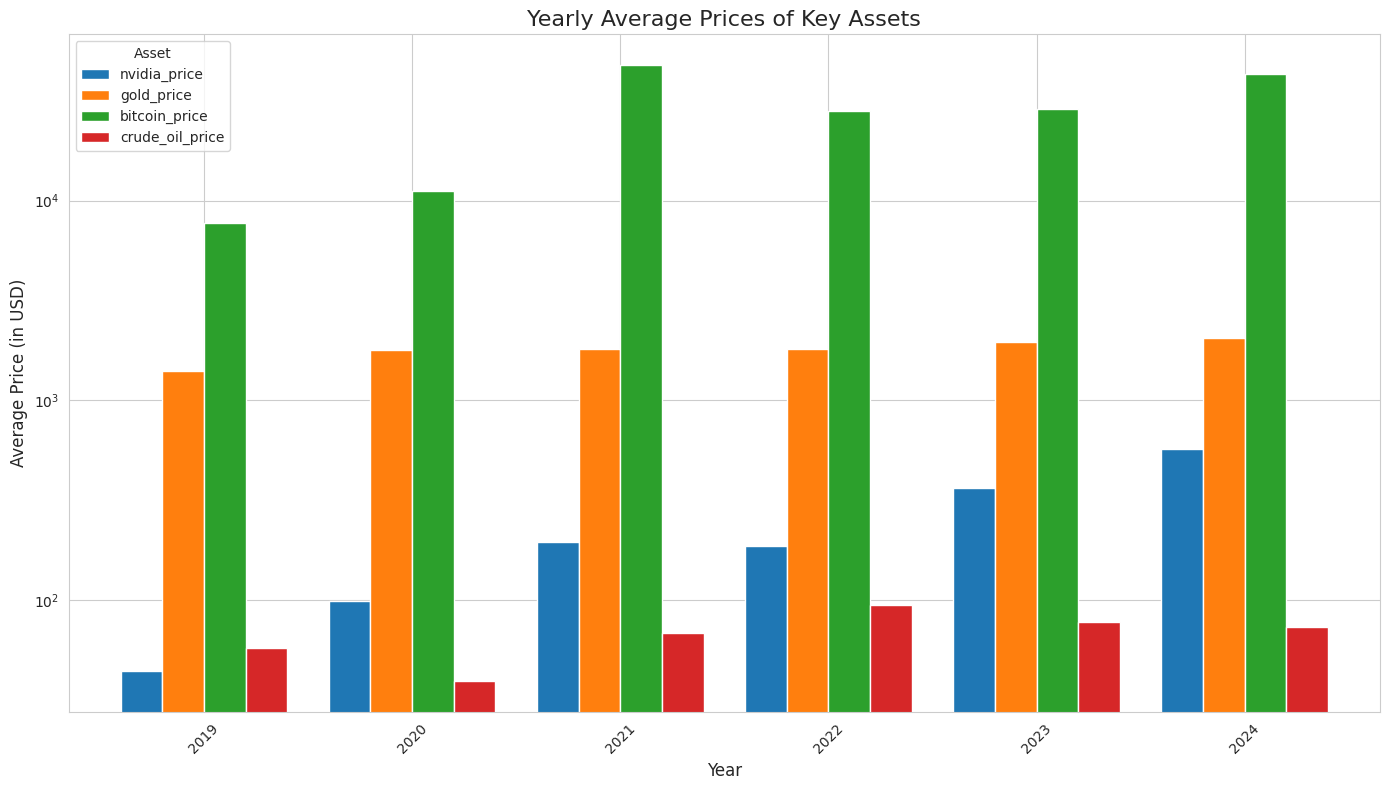

In [ ]:
# This bar chart compares the average price of several assets on a yearly basis,
# making it easy to spot which assets performed best in which years.
print("\nGenerating EDA Plot 5.8: Yearly Average Prices...")
df['year'] = df['date'].dt.year
yearly_avg_prices = df.groupby('year')[['nvidia_price', 'gold_price', 'bitcoin_price', 'crude_oil_price']].mean()

yearly_avg_prices.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.title('Yearly Average Prices of Key Assets', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Price (in USD)', fontsize=12)
plt.xticks(rotation=45)
plt.yscale('log')
plt.legend(title='Asset')
plt.tight_layout()
plt.savefig('yearly_average_prices.png')
plt.show()

#### **5.9. Normalized Price Comparison of Commodities**

**Figure 9**: Line chart showing the normalized price trends for commodities (Natural Gas, Crude Oil, Copper, Gold, Silver, Platinum).

**Observation**: Normalizing prices (scaling them to start at a common value, like 100) allows for a direct comparison of their relative performance, regardless of their actual price. This chart shows that Copper had a very strong performance over the period, outgaining other metals like Gold and Platinum. Natural Gas shows extreme volatility with massive price spikes, distinguishing it from the other commodities.


Generating EDA Plot 5.9: Normalized Price Comparison of Commodities...


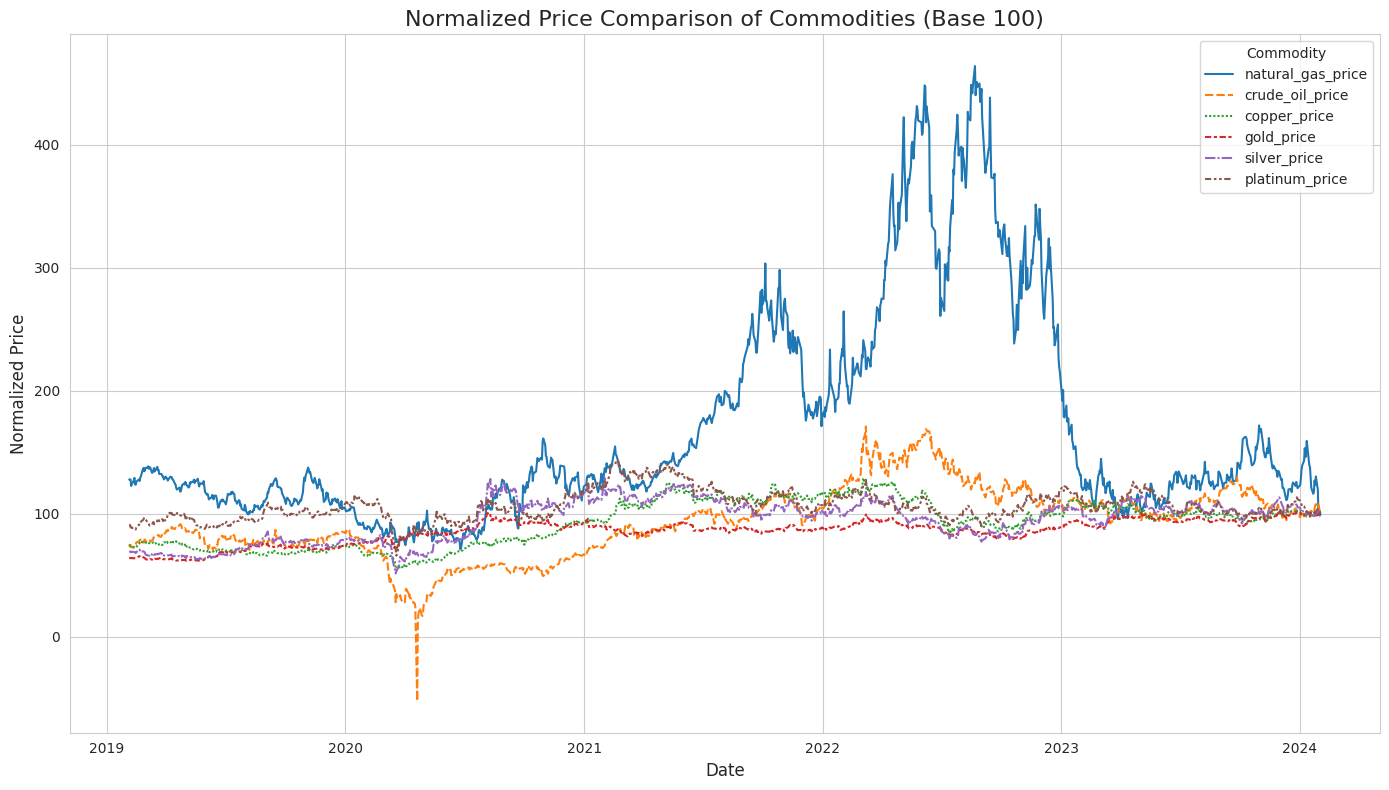

In [ ]:
# Normalizing prices to a common starting point is a great way to compare the performance
# of assets with very different price scales.
print("\nGenerating EDA Plot 5.9: Normalized Price Comparison of Commodities...")
commodities = df[['date', 'natural_gas_price', 'crude_oil_price', 'copper_price', 'gold_price', 'silver_price', 'platinum_price']].set_index('date')
normalized_commodities = (commodities / commodities.iloc[0] * 100)

plt.figure(figsize=(14, 8))
sns.lineplot(data=normalized_commodities)
plt.title('Normalized Price Comparison of Commodities (Base 100)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Normalized Price', fontsize=12)
plt.legend(title='Commodity')
plt.tight_layout()
plt.savefig('normalized_commodities.png')
plt.show()

#### **5.10. Volatility Comparison of Key Assets**

**Figure 10**: Line chart showing the 30-day rolling standard deviation (volatility) for Bitcoin, Tesla, and Gold.

**Observation**: This plot directly compares the risk (volatility) of three different asset types. Bitcoin clearly has the highest volatility, with its standard deviation dwarfing the others. Tesla, known for being a volatile stock, comes in second. Gold, the traditional safe-haven asset, has extremely low volatility in comparison, reinforcing its status as a stable store of value.


Generating EDA Plot 5.10: Volatility Comparison of Key Assets...


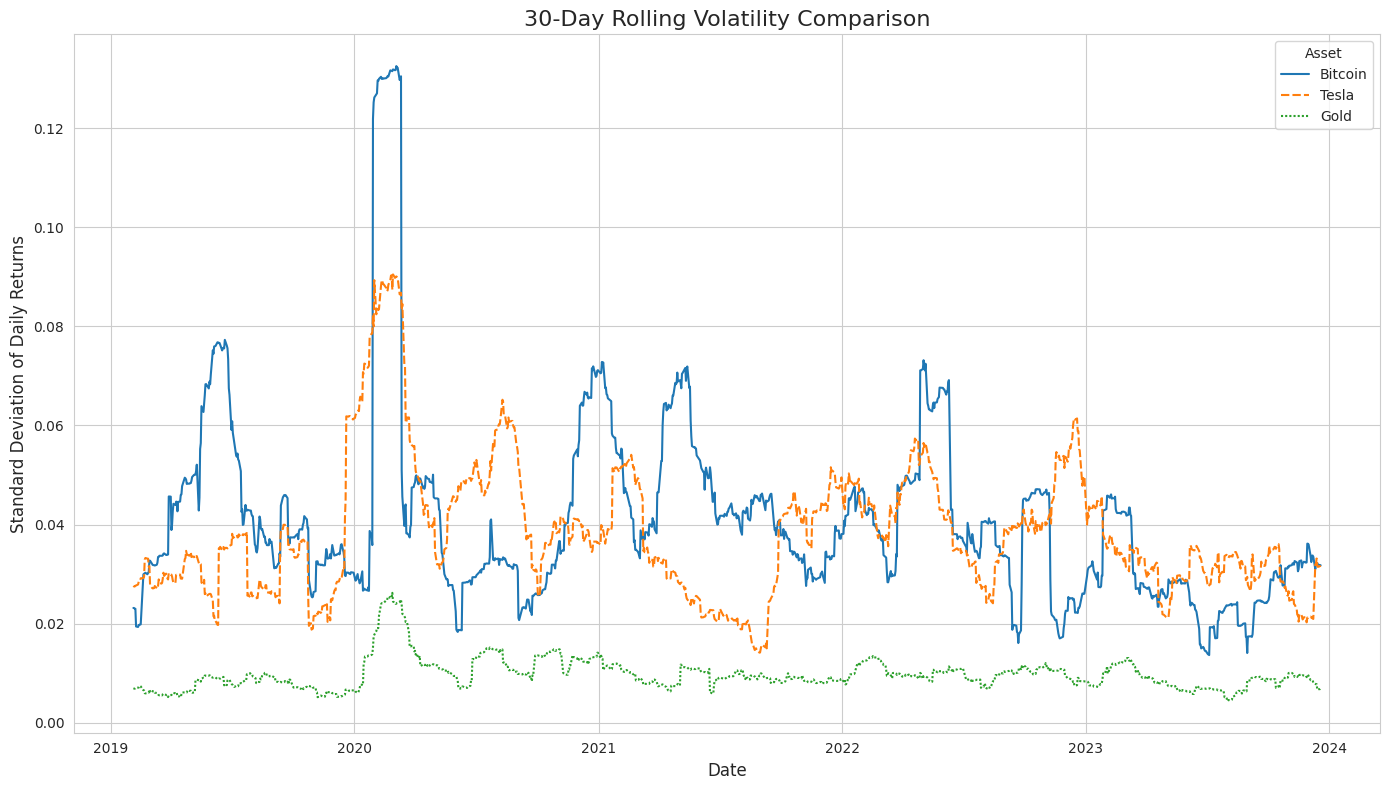

In [ ]:
# This visualization compares the 30-day rolling volatility of different asset classes.
# It provides a clear picture of which assets are riskier than others.
print("\nGenerating EDA Plot 5.10: Volatility Comparison of Key Assets...")
df.set_index('date', inplace=True)
volatility_df = pd.DataFrame()
volatility_df['Bitcoin'] = df['bitcoin_price'].pct_change().rolling(window=30).std()
volatility_df['Tesla'] = df['tesla_price'].pct_change().rolling(window=30).std()
volatility_df['Gold'] = df['gold_price'].pct_change().rolling(window=30).std()
df.reset_index(inplace=True)

plt.figure(figsize=(14, 8))
sns.lineplot(data=volatility_df)
plt.title('30-Day Rolling Volatility Comparison', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Standard Deviation of Daily Returns', fontsize=12)
plt.legend(title='Asset')
plt.tight_layout()
plt.savefig('volatility_comparison.png')
plt.show()

#### **5.11. Sector Performance: Tech vs. Broad Market vs. Energy**

**Figure 11**: Normalized line chart comparing the performance of the Nasdaq 100 (tech sector), S&P 500 (broad market), and Crude Oil (energy sector).

**Observation**: The Nasdaq 100 has significantly outperformed the broader S&P 500 over the five years, highlighting the strong growth in the technology sector. Crude Oil's performance is much more cyclical, showing a major dip in 2020 (related to the pandemic) followed by a strong recovery. This chart effectively contrasts the growth trend of tech with the cyclical nature of energy.


Generating EDA Plot 5.11: Sector Performance Comparison...


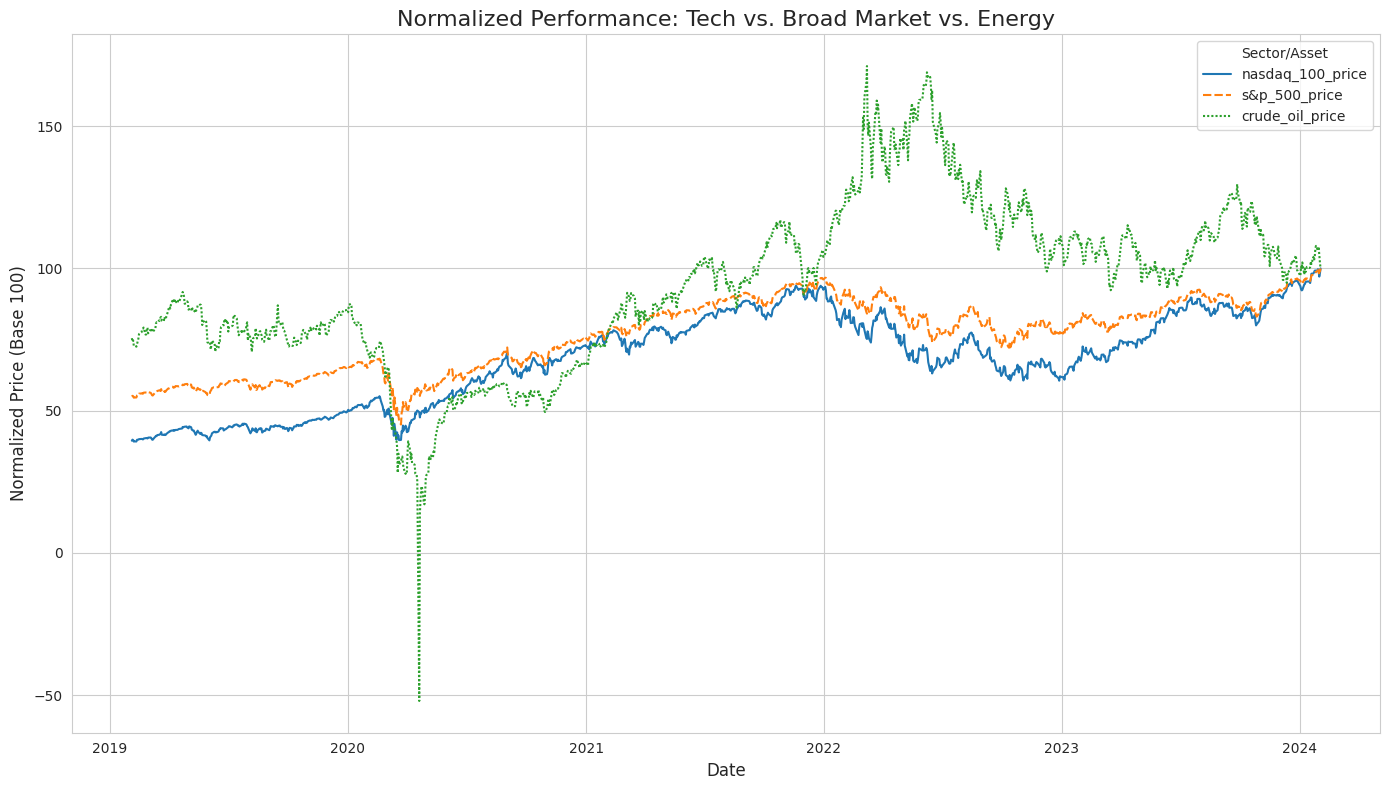

In [ ]:
# This plot compares the normalized performance of different market sectors.
print("\nGenerating EDA Plot 5.11: Sector Performance Comparison...")
sectors = df[['date', 'nasdaq_100_price', 's&p_500_price', 'crude_oil_price']].set_index('date')
normalized_sectors = (sectors / sectors.iloc[0] * 100)

plt.figure(figsize=(14, 8))
sns.lineplot(data=normalized_sectors)
plt.title('Normalized Performance: Tech vs. Broad Market vs. Energy', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Normalized Price (Base 100)', fontsize=12)
plt.legend(title='Sector/Asset')
plt.tight_layout()
plt.savefig('sector_performance.png')
plt.show()

#### **5.12. Nvidia Price vs. Volume Scatter Plot**

**Figure 12**: Scatter plot showing the relationship between Nvidia's daily stock price and its trading volume.

**Observation**: This scatter plot helps visualize the relationship between price and volume. Generally, there is no perfectly clear linear relationship, but we can observe that the highest volume days tend to occur during periods of significant price movement (both up and down). The dense cluster at lower prices and volumes represents periods of normal market activity, while the scattered points at higher prices and volumes represent periods of high interest and volatility.


Generating EDA Plot 5.12: Nvidia Price vs. Volume Scatter Plot...


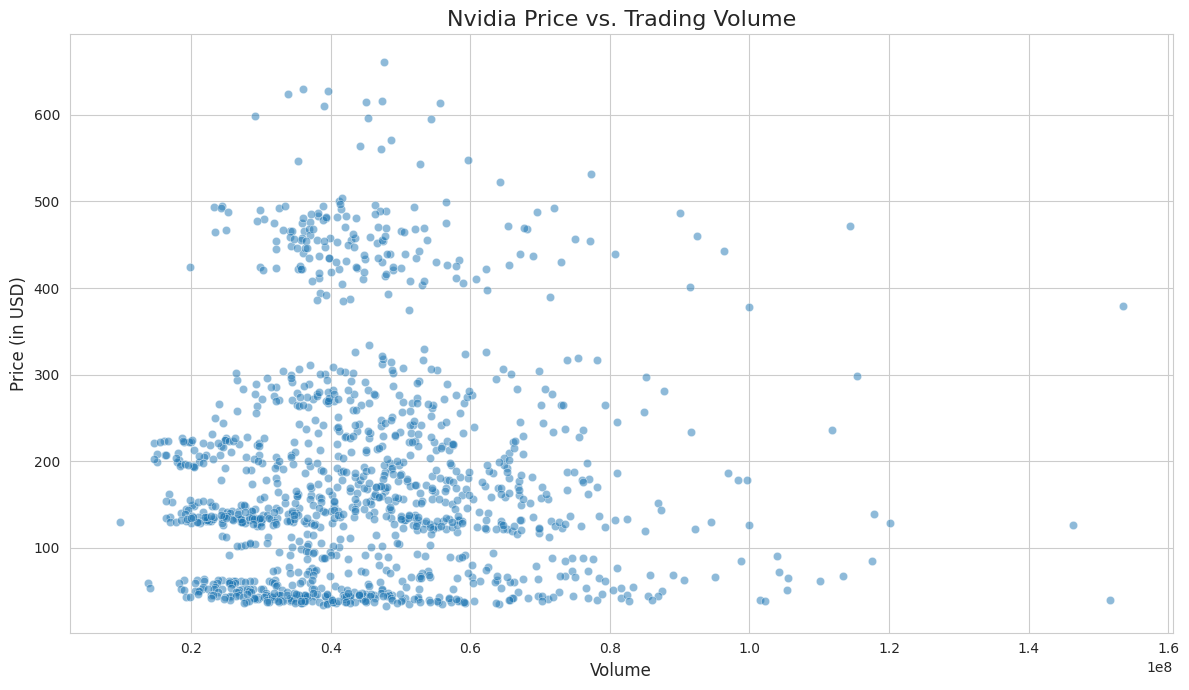

In [ ]:
# A scatter plot of price vs. volume can reveal if high trading activity is associated with price increases or decreases.
print("\nGenerating EDA Plot 5.12: Nvidia Price vs. Volume Scatter Plot...")
plt.figure(figsize=(12, 7))
sns.scatterplot(x='nvidia_vol_', y='nvidia_price', data=df, alpha=0.5)
plt.title('Nvidia Price vs. Trading Volume', fontsize=16)
plt.xlabel('Volume', fontsize=12)
plt.ylabel('Price (in USD)', fontsize=12)
plt.tight_layout()
plt.savefig('nvidia_price_vs_volume.png')
plt.show()

#### **5.13. S&P 500 Monthly Returns Heatmap**

**Figure 13**: Heatmap showing the average percentage return for the S&P 500 for each month across the years.

**Observation**: This heatmap is excellent for spotting seasonal trends. For example, we can see strong performance in several Novembers (a common end-of-year rally). Conversely, months like September and February show periods of negative returns. The dramatic negative return in March 2020 clearly marks the COVID-19 market crash. This visualization provides a quick and powerful summary of market seasonality and major events.


Generating EDA Plot 5.13: S&P 500 Monthly Returns Heatmap...


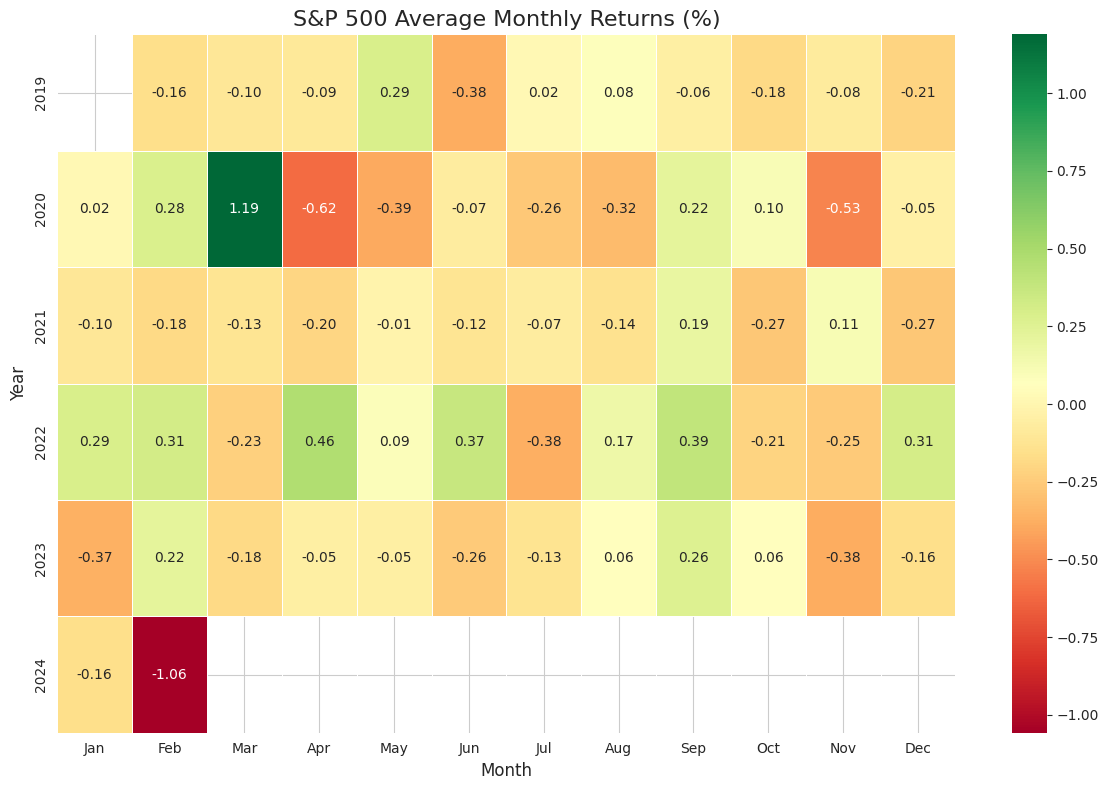

In [ ]:
# This heatmap visualizes seasonality in market returns by showing the average return for each month of each year.
print("\nGenerating EDA Plot 5.13: S&P 500 Monthly Returns Heatmap...")
df['month_name'] = df['date'].dt.strftime('%b')
monthly_returns = df.pivot_table(values='sp500_returns', index='year', columns='month_name', aggfunc='mean')
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_returns = monthly_returns.reindex(columns=month_order)

plt.figure(figsize=(12, 8))
sns.heatmap(monthly_returns, annot=True, cmap='RdYlGn', fmt='.2f', linewidths=.5)
plt.title('S&P 500 Average Monthly Returns (%)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.tight_layout()
plt.savefig('sp500_monthly_returns_heatmap.png')
plt.show()

#### **5.14. Cryptocurrency Performance: Bitcoin vs. Ethereum**

**Figure 14**: Normalized line chart comparing the price performance of Bitcoin and Ethereum.

**Observation**: As expected from their high correlation, Bitcoin and Ethereum's price movements are very similar. However, this normalized chart reveals that Ethereum had a period of significant outperformance relative to Bitcoin, especially during the 2021 bull market. This indicates that while they move in the same general direction, the magnitude of their returns can differ substantially.


Generating EDA Plot 5.14: Cryptocurrency Performance Comparison...


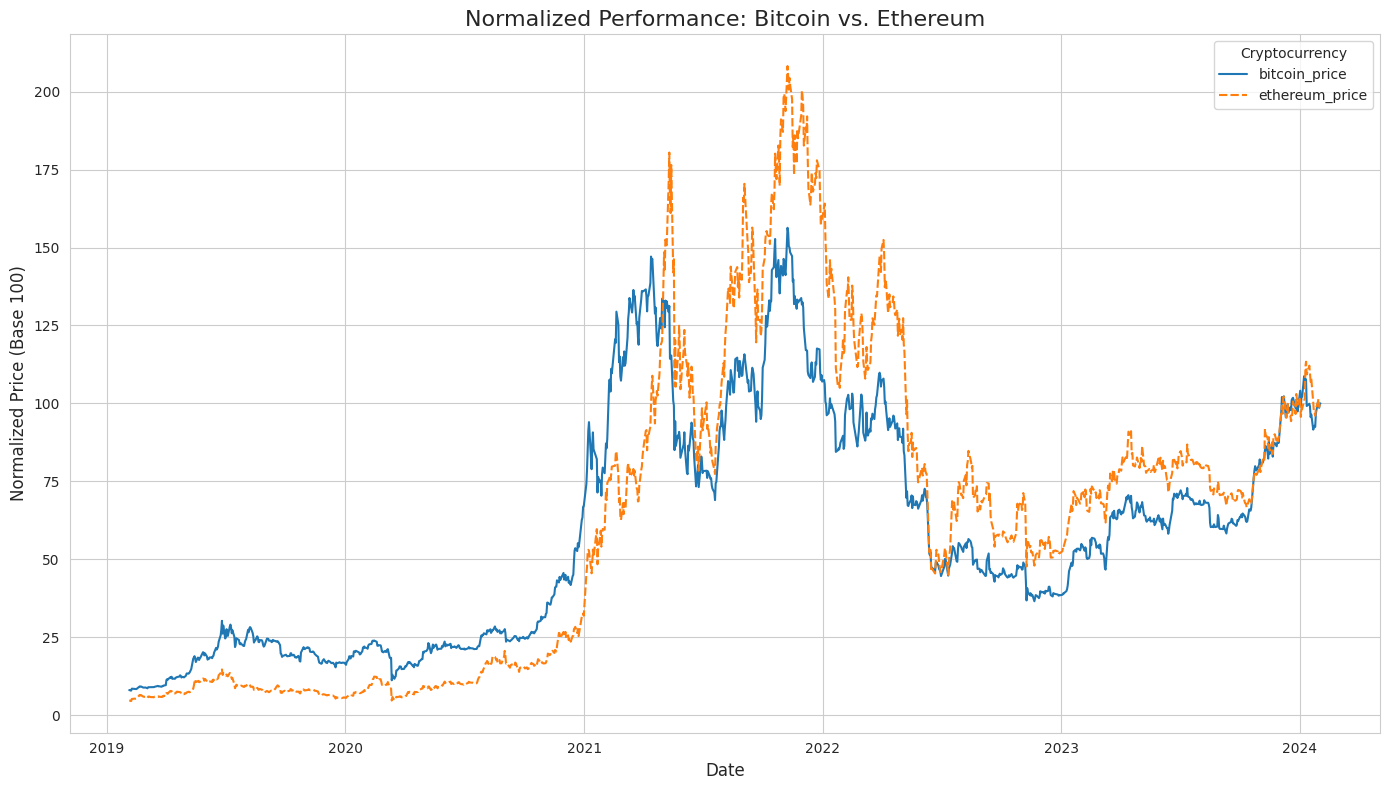

In [ ]:
# This plot provides a direct performance comparison between the two largest cryptocurrencies.
print("\nGenerating EDA Plot 5.14: Cryptocurrency Performance Comparison...")
crypto = df[['date', 'bitcoin_price', 'ethereum_price']].set_index('date')
normalized_crypto = (crypto / crypto.iloc[0] * 100)

plt.figure(figsize=(14, 8))
sns.lineplot(data=normalized_crypto)
plt.title('Normalized Performance: Bitcoin vs. Ethereum', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Normalized Price (Base 100)', fontsize=12)
plt.legend(title='Cryptocurrency')
plt.tight_layout()
plt.savefig('crypto_performance.png')
plt.show()

#### **5.15. Precious Metals Price Comparison**

**Figure 15**: Normalized line chart comparing the price performance of Gold, Silver, and Platinum.

**Observation**: This chart compares the performance of precious metals. Silver shows the most volatility of the three, with a significant spike in 2020. Gold remains the most stable, with slow and steady growth. Platinum's performance has been relatively flat compared to the other two over this specific period. This highlights the different roles these metals play in an investment portfolio.


Generating EDA Plot 5.15: Precious Metals Price Comparison...


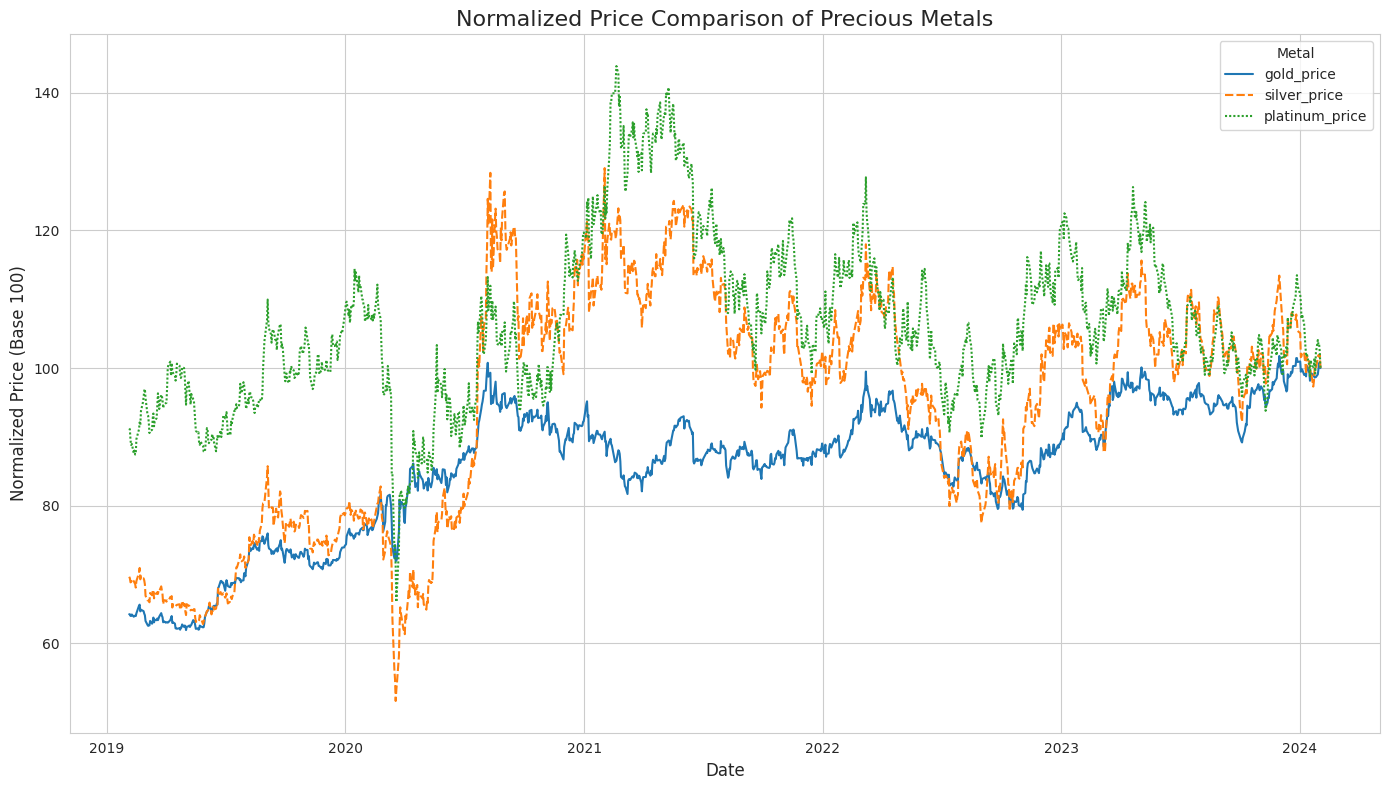

In [ ]:
# This plot compares the performance of precious metals, which are often considered safe-haven assets.
print("\nGenerating EDA Plot 5.15: Precious Metals Price Comparison...")
metals = df[['date', 'gold_price', 'silver_price', 'platinum_price']].set_index('date')
normalized_metals = (metals / metals.iloc[0] * 100)

plt.figure(figsize=(14, 8))
sns.lineplot(data=normalized_metals)
plt.title('Normalized Price Comparison of Precious Metals', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Normalized Price (Base 100)', fontsize=12)
plt.legend(title='Metal')
plt.tight_layout()
plt.savefig('precious_metals_performance.png')
plt.show()

#### **5.16. Distribution of Tech Stock Prices**

**Figure 16**: A set of histograms (one for each tech stock) showing the distribution of their prices over the 5-year period.

**Observation**: These distributions provide insight into the price behavior of each stock. For stocks with strong and consistent growth like Microsoft and Nvidia, the distribution is skewed to the right, with a long tail of higher prices. Tesla's distribution is also right-skewed but shows more distinct clusters, reflecting its periods of rapid price appreciation. This visualization helps in understanding the character of each stock's growth.


Generating EDA Plot 5.16: Distribution of Tech Stock Prices...


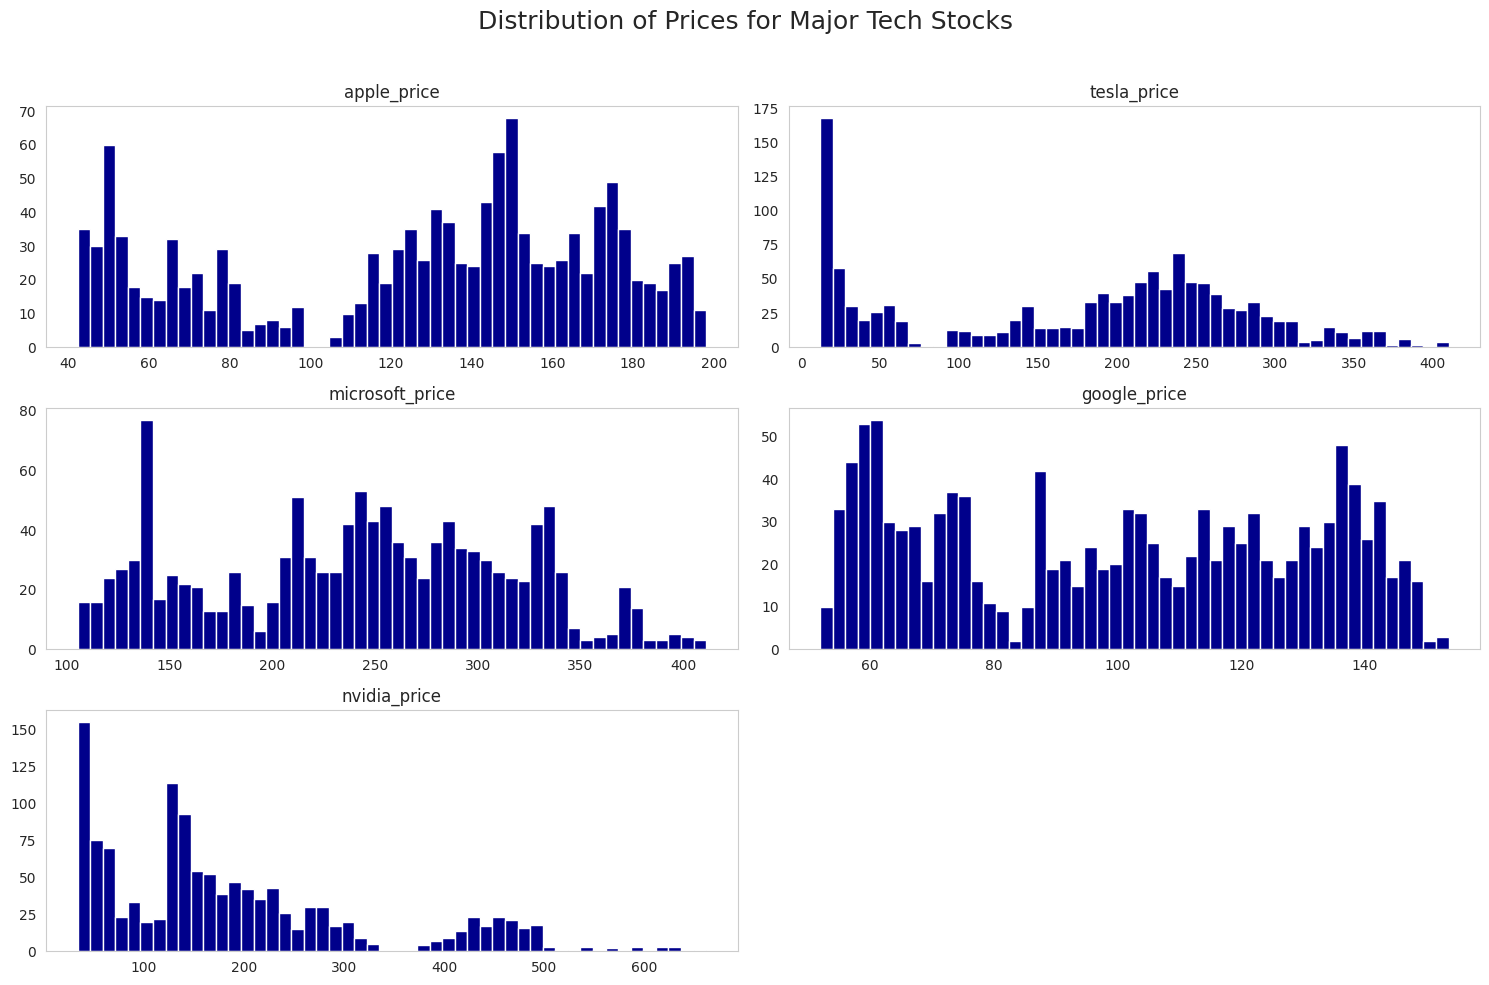

In [ ]:
# This series of histograms shows the price distribution for each major tech stock,
# helping to visualize where each stock's price has spent the most time.
print("\nGenerating EDA Plot 5.16: Distribution of Tech Stock Prices...")
tech_stocks_for_dist = df[['apple_price', 'tesla_price', 'microsoft_price', 'google_price', 'nvidia_price']]

tech_stocks_for_dist.hist(figsize=(15, 10), bins=50, color='darkblue', grid=False)
plt.suptitle('Distribution of Prices for Major Tech Stocks', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('tech_stock_price_distributions.png')
plt.show()

### **6. SAVING THE CLEANED DATASET (LOAD)**

In [ ]:
# Finally, we save the cleaned and preprocessed DataFrame to a new CSV file.
# This file meets the submission requirement for a "cleaned dataset" and can be
# used for future machine learning tasks.
df['sp500_returns'] = df['s&p_500_price'].pct_change() * 100
output_file_path = 'cleaned_stock_market_data.csv'
df.to_csv(output_file_path, index=False)

print("\n--- Project Script Complete ---")
print(f"Cleaned dataset has been saved to '{output_file_path}'.")
print(f"The cleaned data has {df.shape[0]} rows and {df.shape[1]} columns.")


--- Project Script Complete ---
Cleaned dataset has been saved to 'cleaned_stock_market_data.csv'.
The cleaned data has 1243 rows and 42 columns.


### **7. Outline of Proposed Machine Learning Algorithms**

Based on the time-series nature of the data and the insights from the EDA, the dataset is well-suited for a time-series forecasting task to predict future asset prices. For example, we could focus on predicting the `s&p_500_price` for the next day.

The following machine learning algorithms are proposed for this purpose:

### 7.1. ARIMA (Autoregressive Integrated Moving Average)
- **Objective:** To establish a classical statistical baseline model for time-series forecasting.
- **Method:** ARIMA models capture information from past values (*Autoregressive*), handle trends by differencing the data (*Integrated*), and model shock events from past errors (*Moving Average*). It would be applied directly to the price series of a single asset (e.g., S&P 500).
- **Expected Outcome:** This model will provide a robust baseline for forecasting performance. While it may not capture complex market dynamics, its effectiveness will serve as a benchmark for more advanced models.

### 7.2. Random Forest Regressor
- **Objective:** To capture non-linear relationships using a feature-based approach.
- **Method:** Instead of treating the data as a pure time series, we can create features from past data (e.g., "price 1 day ago", "price 2 days ago", "30-day moving average"). A Random Forest Regressor can then be trained on these features to predict the next day's price.
- **Expected Outcome:** This model is expected to perform well by capturing complex interactions between past prices, volumes, and moving averages. It can also provide insights into which lagged features are most important for prediction.

### 7.3. LSTM (Long Short-Term Memory) Neural Network
- **Objective:** To leverage a sophisticated deep learning model designed specifically for sequential data.
- **Method:** LSTMs are a type of Recurrent Neural Network (RNN) capable of learning long-term dependencies in data, making them ideal for financial time series which are influenced by events over various time horizons. The model would be trained on sequences of past data to predict future price points.
- **Expected Outcome:** This is expected to be the most powerful and potentially most accurate model. It is capable of learning intricate, time-dependent patterns from the price and volume data that simpler models might miss, delivering highly precise price forecasts.


**Created By:**<br>
Name: Pratham Agrawal<br>
PRN: 22070521078<br>
Sem: 7th<br>
Sec: C<br>